In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
#from scipy.stats import binom
from scipy.stats import weibull_min
#conda install fitter


https://data.gov.ie/dataset/a8e90f64-ddd1-4c29-97f4-dbabac4b0bee/resource/ada656d9-f9d4-4dfb-9049-62a3a526934a
https://data.gov.ie/dataset/general-election-of-may-2007-general-statistics

In [296]:

df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',nrows = 267)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5


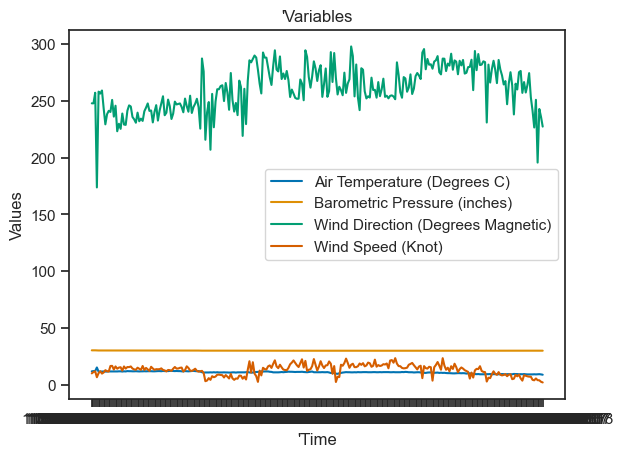

In [297]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()
plt.show()

as shown above , data is sporadic so removing dates from start. need to figure out how to do date range 

In [298]:
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
#sns.lineplot(data=df2, x = "SensorTimestamp", y = "Wind Speed (Knot)")
#plt.title("'Variables")
#plt.xlabel("'Time")
#plt.ylabel("Values")
#plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
#plt.show()

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type asa datetime

In [299]:
df1['SensorTimestamp']


0      11/08/2015 14:54:33
1      11/08/2015 14:54:42
2      11/08/2015 14:56:59
3      13/08/2015 10:50:11
4      13/08/2015 12:02:42
              ...         
262    14/08/2015 23:36:17
263    14/08/2015 23:41:17
264    14/08/2015 23:46:17
265    14/08/2015 23:51:17
266    14/08/2015 23:56:18
Name: SensorTimestamp, Length: 267, dtype: object

In [300]:
pd.to_datetime(df1['SensorTimestamp'])

0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: SensorTimestamp, Length: 267, dtype: datetime64[ns]

new variable datetime added

In [301]:
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])


In [302]:
df1['datetime']


0     2015-11-08 14:54:33
1     2015-11-08 14:54:42
2     2015-11-08 14:56:59
3     2015-08-13 10:50:11
4     2015-08-13 12:02:42
              ...        
262   2015-08-14 23:36:17
263   2015-08-14 23:41:17
264   2015-08-14 23:46:17
265   2015-08-14 23:51:17
266   2015-08-14 23:56:18
Name: datetime, Length: 267, dtype: datetime64[ns]

In [303]:
df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015 ']
df2

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


In [304]:
df3=df2.loc[df2.loc[:,'datetime'] <='2015/08/25']
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot),datetime
72,14/08/2015 00:02:20,10.9,29.9198,226.7,6.5,2015-08-14 00:02:20
73,14/08/2015 00:07:21,10.7,29.9139,249.4,7.1,2015-08-14 00:07:21
74,14/08/2015 00:12:22,10.9,29.9139,260.2,8.7,2015-08-14 00:12:22
75,14/08/2015 00:17:22,10.7,29.9109,260.2,8.8,2015-08-14 00:17:22
76,14/08/2015 00:22:22,10.7,29.9080,263.0,8.5,2015-08-14 00:22:22
...,...,...,...,...,...,...
262,14/08/2015 23:36:17,9.0,29.8725,250.9,5.4,2015-08-14 23:36:17
263,14/08/2015 23:41:17,9.1,29.8784,195.6,3.9,2015-08-14 23:41:17
264,14/08/2015 23:46:17,9.2,29.8725,242.8,3.8,2015-08-14 23:46:17
265,14/08/2015 23:51:17,9.0,29.8755,235.9,2.5,2015-08-14 23:51:17


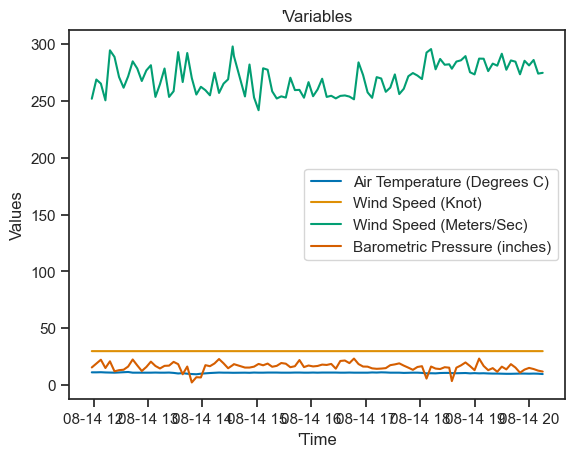

In [305]:
sns.lineplot(data=df3[50:150], x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3[50:150], x = "datetime", y = "Wind Speed (Knot)")
#axis('equal')
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Wind Speed (Knot)","Wind Speed (Meters/Sec)","Barometric Pressure (inches)"])
plt.show()

In [306]:
#df3

In [307]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


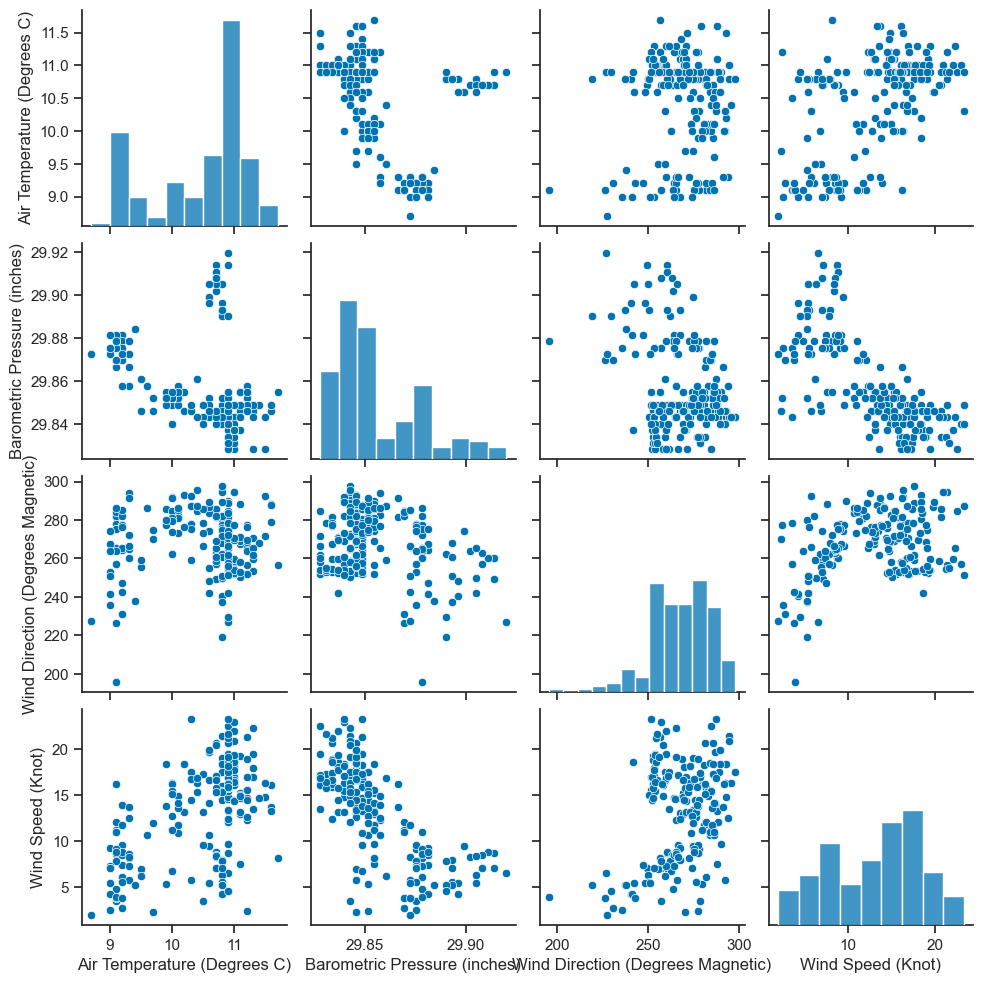

In [308]:
sns.pairplot(df3)
plt.show()

Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]

<AxesSubplot:title={'center':'Air Temp vs Barometric Pressure (inches)'}, xlabel='Air Temperature (Degrees C)'>

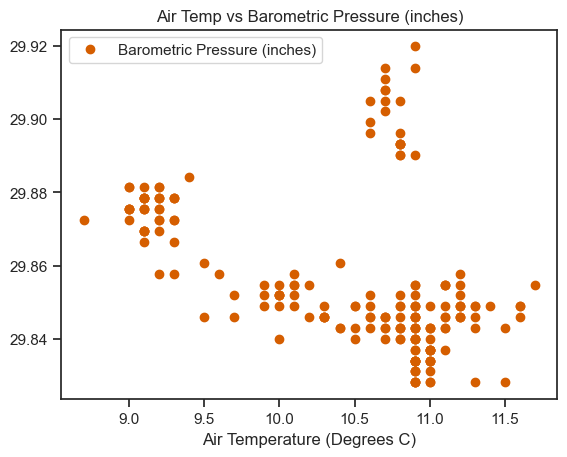

In [309]:
df3.plot(x='Air Temperature (Degrees C)', y='Barometric Pressure (inches)', style='ro', title="Air Temp vs Barometric Pressure (inches)")

<AxesSubplot:title={'center':'Air Temp and Wind Speed'}, xlabel='Air Temperature (Degrees C)'>

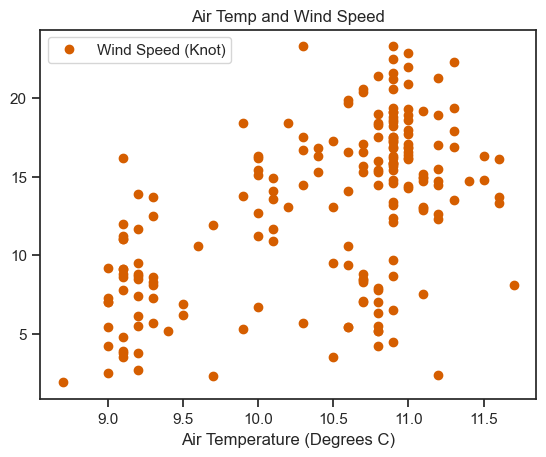

In [310]:
df3.plot(x='Air Temperature (Degrees C)', y='Wind Speed (Knot)', style='ro', title="Air Temp and Wind Speed")

Displaying data types of each variable

In [311]:
df3.dtypes

SensorTimestamp                              object
Air Temperature (Degrees C)                 float64
Barometric Pressure (inches)                float64
Wind Direction (Degrees Magnetic)           float64
Wind Speed (Knot)                           float64
datetime                             datetime64[ns]
dtype: object

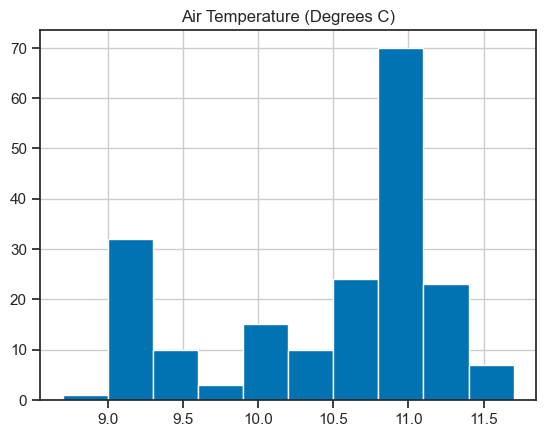

In [312]:

df3.hist('Air Temperature (Degrees C)')
plt.show()

In [313]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=100, freq="MIN")
idx1

DatetimeIndex(['2023-11-08 00:00:33', '2023-11-08 00:01:33',
               '2023-11-08 00:02:33', '2023-11-08 00:03:33',
               '2023-11-08 00:04:33', '2023-11-08 00:05:33',
               '2023-11-08 00:06:33', '2023-11-08 00:07:33',
               '2023-11-08 00:08:33', '2023-11-08 00:09:33',
               '2023-11-08 00:10:33', '2023-11-08 00:11:33',
               '2023-11-08 00:12:33', '2023-11-08 00:13:33',
               '2023-11-08 00:14:33', '2023-11-08 00:15:33',
               '2023-11-08 00:16:33', '2023-11-08 00:17:33',
               '2023-11-08 00:18:33', '2023-11-08 00:19:33',
               '2023-11-08 00:20:33', '2023-11-08 00:21:33',
               '2023-11-08 00:22:33', '2023-11-08 00:23:33',
               '2023-11-08 00:24:33', '2023-11-08 00:25:33',
               '2023-11-08 00:26:33', '2023-11-08 00:27:33',
               '2023-11-08 00:28:33', '2023-11-08 00:29:33',
               '2023-11-08 00:30:33', '2023-11-08 00:31:33',
               '2023-11-

In [314]:
rng1 = np.random.default_rng()
mu1, sigma1 = 10.42, .76
ts1 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])
ts1

,Synthesised Air Temperature (Degrees C)
2023-11-08 00:00:33,10.029981
2023-11-08 00:01:33,10.679350
2023-11-08 00:02:33,9.853107
2023-11-08 00:03:33,9.371331
2023-11-08 00:04:33,11.983292
...,...
2023-11-08 01:35:33,10.233572
2023-11-08 01:36:33,10.017786
2023-11-08 01:37:33,9.813519
2023-11-08 01:38:33,10.367131


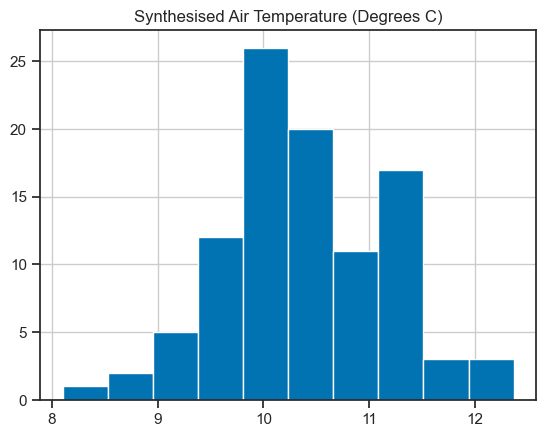

In [315]:
ts1.hist('Synthesised Air Temperature (Degrees C)')
plt.show()

<AxesSubplot:xlabel='datetime', ylabel='Air Temperature (Degrees C)'>

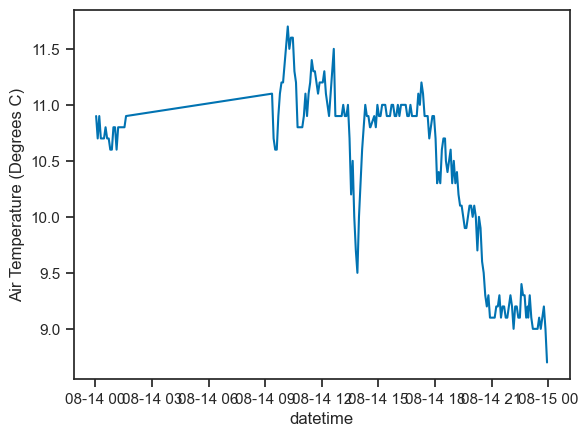

In [316]:
sns.lineplot(data=df3, x="datetime", y = "Air Temperature (Degrees C)")

#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

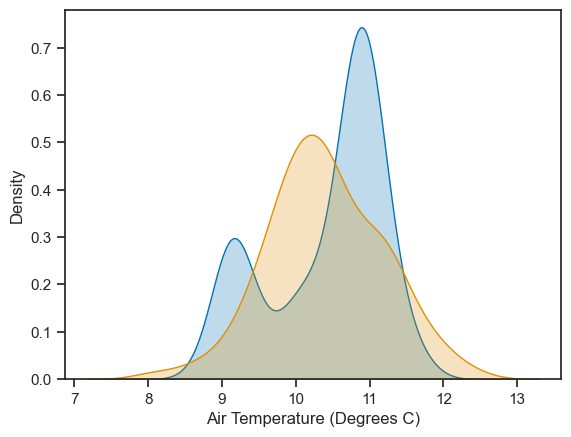

In [317]:
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot(ts1['Synthesised Air Temperature (Degrees C)'],shade=True)


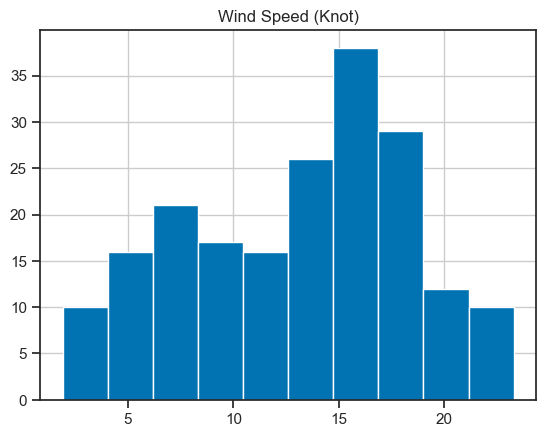

In [318]:
df3.hist('Wind Speed (Knot)')
plt.show()

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

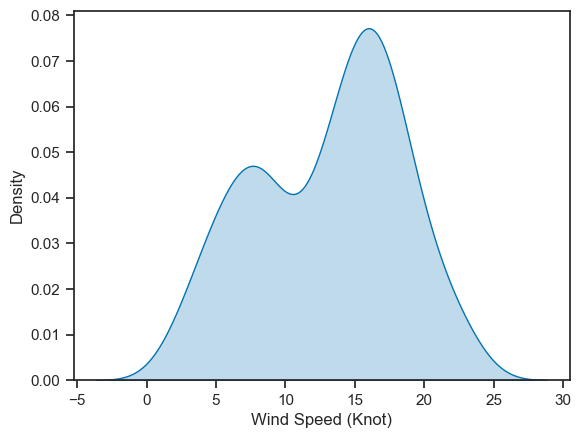

In [319]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)

In [320]:
#idx2 = pd.date_range(start = "2015-11-08 14:54:33", periods=100, freq="MIN")
#idx2

In [321]:
rng2 = np.random.default_rng()
mu1, sigma1 = 13.04, 5.29
ts2 = pd.DataFrame(data=rng2.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot)'])
ts2

,Synthesised Wind Speed (Knot)
2023-11-08 00:00:33,6.630054
2023-11-08 00:01:33,6.408761
2023-11-08 00:02:33,9.408541
2023-11-08 00:03:33,11.614024
2023-11-08 00:04:33,8.514706
...,...
2023-11-08 01:35:33,8.044329
2023-11-08 01:36:33,18.761597
2023-11-08 01:37:33,10.053933
2023-11-08 01:38:33,22.377070


In [322]:
#rng1 = np.random.default_rng()
#shape = 5.0
#scale = 2.0
#values = weibull_min.rvs(2.1,8.5, size=100)
#ts2 = pd.DataFrame(data=rng1.weibull(15,len(idx1)),index =idx1, columns=['Synthesised Wind Speed (Knot)'])
#ts2

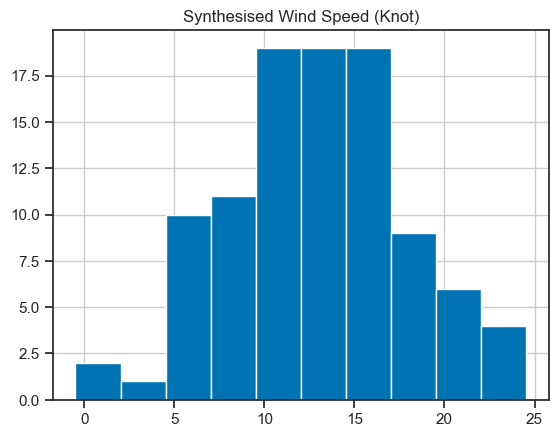

In [323]:
ts2.hist()
plt.show()

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

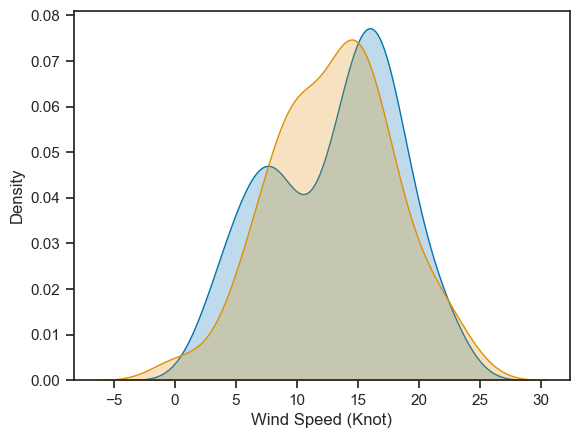

In [324]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True)

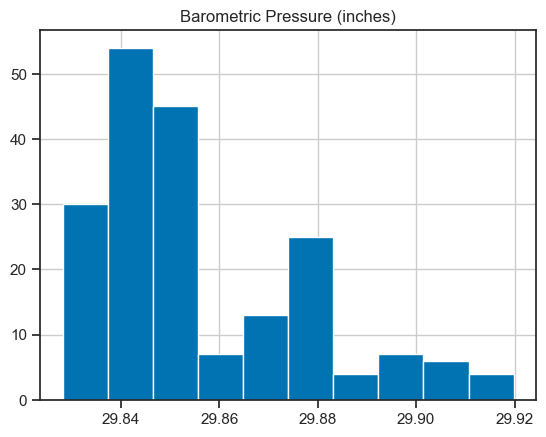

In [325]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [326]:
#sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True)

In [327]:
rng3 = np.random.default_rng()
mu1, sigma1 = 29.85, 0.02
ts3 = pd.DataFrame(data=rng3.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Barometric'])
ts3

,Synthesised Barometric
2023-11-08 00:00:33,29.848254
2023-11-08 00:01:33,29.870125
2023-11-08 00:02:33,29.856606
2023-11-08 00:03:33,29.854842
2023-11-08 00:04:33,29.844220
...,...
2023-11-08 01:35:33,29.828882
2023-11-08 01:36:33,29.870357
2023-11-08 01:37:33,29.855431
2023-11-08 01:38:33,29.909592


<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

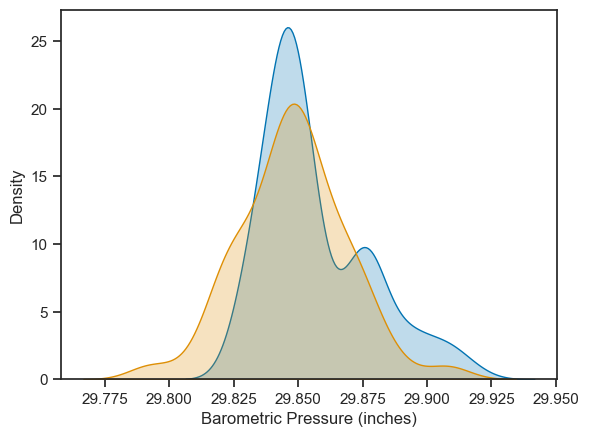

In [328]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True)
sns.kdeplot(ts3['Synthesised Barometric'],shade=True)

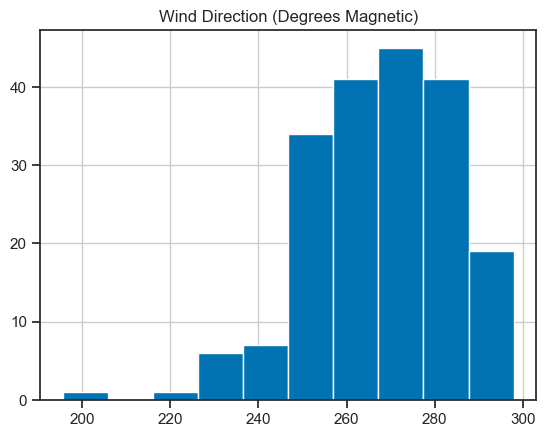

In [329]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

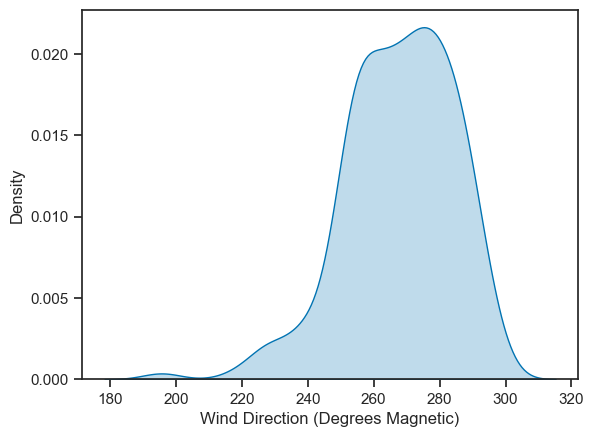

In [330]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [331]:
rng4 = np.random.default_rng()
mu1, sigma1 = 267.73, 16.53
ts4 = pd.DataFrame(data=rng4.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])
ts4

,Synthesised Wind Direction (Degrees Magnetic)
2023-11-08 00:00:33,267.437221
2023-11-08 00:01:33,228.405986
2023-11-08 00:02:33,260.847114
2023-11-08 00:03:33,245.679133
2023-11-08 00:04:33,278.980329
...,...
2023-11-08 01:35:33,262.318008
2023-11-08 01:36:33,249.721551
2023-11-08 01:37:33,294.520344
2023-11-08 01:38:33,260.689669


<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

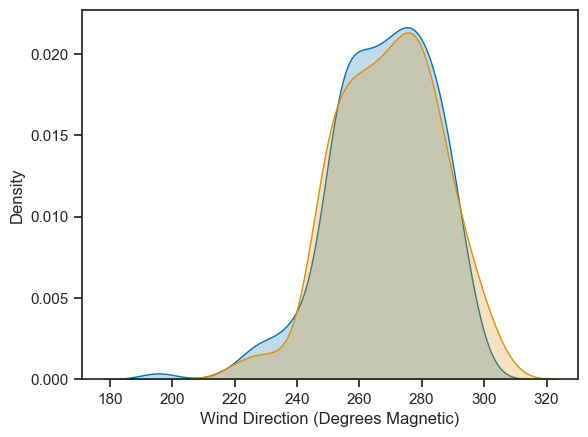

In [332]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True, label="actual")
sns.kdeplot(ts4['Synthesised Wind Direction (Degrees Magnetic)'],shade=True, label="simulated")

In [333]:
#sns.kdeplot(ts2['Synthesised Wind Speed (Knot)'],shade=True, label="simulated")

In [334]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [335]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

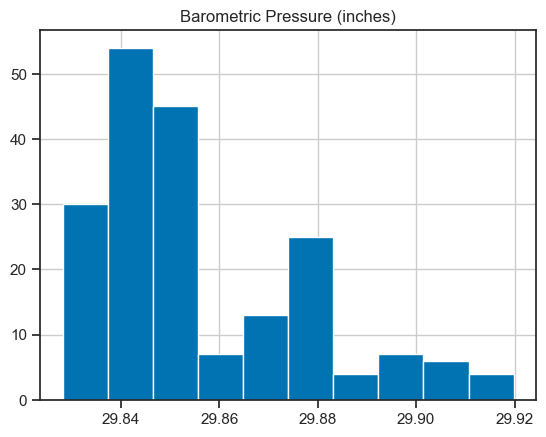

In [336]:
df3.hist('Barometric Pressure (inches)')
plt.show()

In [337]:
#idx1 = pd.date_range(start = "2015-11-08 14:54:33", periods=200, freq="MIN")
#idx1

In [338]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
#ts1

In [339]:
#ts1.hist('Synthesises Weibull')
plt.show()

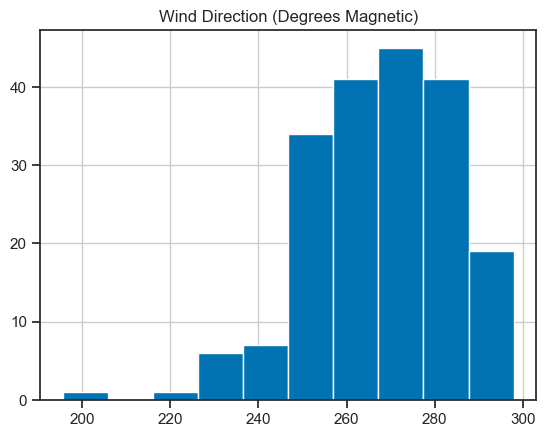

In [340]:
df3.hist('Wind Direction (Degrees Magnetic)')
plt.show()

<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

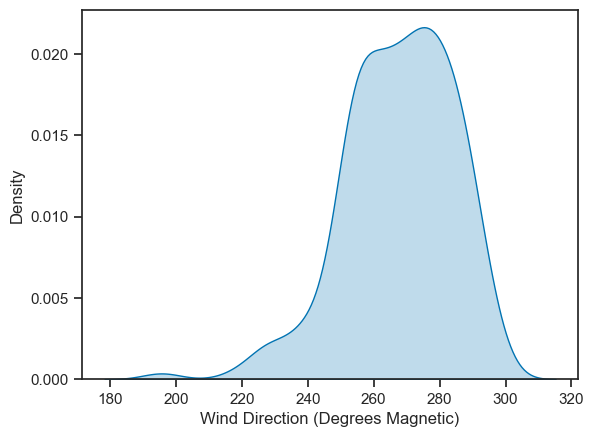

In [341]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [342]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,253.097699
2023-11-08 00:01:33,270.676875
2023-11-08 00:02:33,271.575967
2023-11-08 00:03:33,259.760436
2023-11-08 00:04:33,226.983145
...,...
2023-11-08 01:35:33,272.153122
2023-11-08 01:36:33,284.963468
2023-11-08 01:37:33,273.084961
2023-11-08 01:38:33,261.963260


<AxesSubplot:xlabel='Synthesised Wind direction', ylabel='Density'>

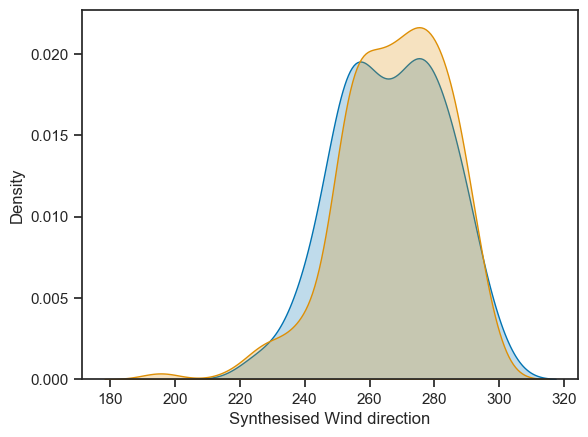

In [343]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)

In [344]:
result=pd.concat([ts1,ts2,ts3,ts4])
result

,Synthesised Air Temperature (Degrees C),Synthesised Wind Speed (Knot),Synthesised Barometric,Synthesised Wind direction
2023-11-08 00:00:33,10.029981,NaN,NaN,NaN
2023-11-08 00:01:33,10.679350,NaN,NaN,NaN
2023-11-08 00:02:33,9.853107,NaN,NaN,NaN
2023-11-08 00:03:33,9.371331,NaN,NaN,NaN
2023-11-08 00:04:33,11.983292,NaN,NaN,NaN
...,...,...,...,...
2023-11-08 01:35:33,NaN,NaN,NaN,272.153122
2023-11-08 01:36:33,NaN,NaN,NaN,284.963468
2023-11-08 01:37:33,NaN,NaN,NaN,273.084961
2023-11-08 01:38:33,NaN,NaN,NaN,261.963260


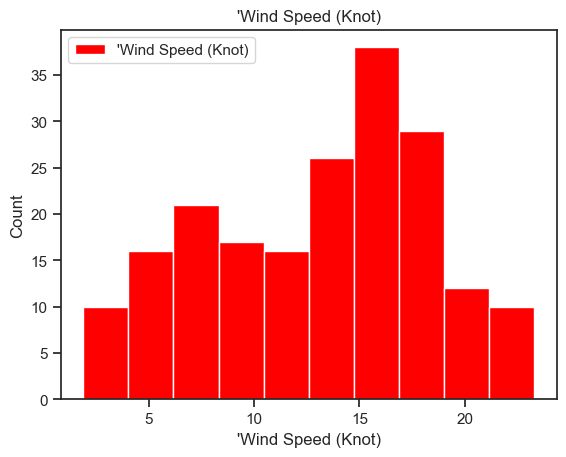

In [345]:
a = df3['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

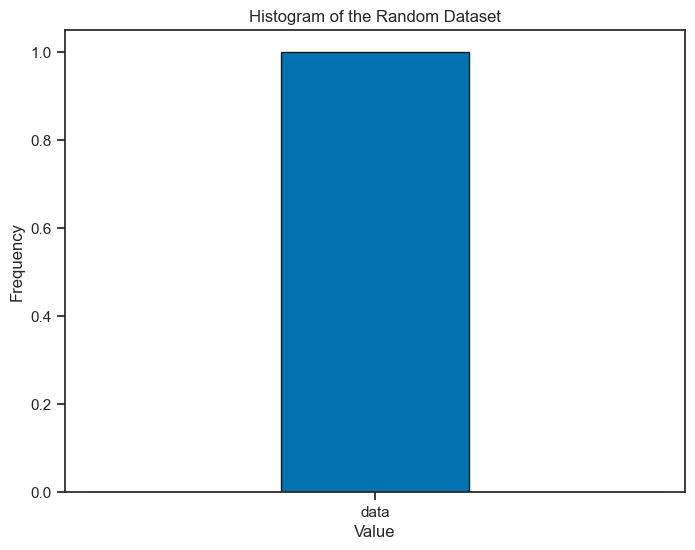

In [346]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [347]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")
idx

DatetimeIndex(['2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31', '2025-12-31',
               '2026-12-31', '2027-12-31', '2028-12-31', '2029-12-31',
               '2030-12-31', '2031-12-31', '2032-12-31', '2033-12-31',
               '2034-12-31', '2035-12-31', '2036-12-31', '2037-12-31',
               '2038-12-31', '2039-12-31', '2040-12-31', '2041-12-31',
               '2042-12-31', '2043-12-31', '2044-12-31', '2045-12-31',
               '2046-12-31', '2047-12-31', '2048-12-31', '2049-12-31',
               '2050-12-31', '2051-12-31', '2052-12-31', '2053-12-31',
               '2054-12-31', '2055-12-31', '2056-12-31', '2057-12-31',
               '2058-12-31', '2059-12-31', '2060-12-31', '2061-12-31',
               '2062-12-31', '2063-12-31', '2064-12-31', '2065-12-31',
               '2066-12-31', '2067-12-31', '2068-12-31', '2069-12-31',
               '2070-12-31', '2071-12-31', '2072-12-31', '2073-12-31',
      

In [348]:
rng = np.random.default_rng()



generate random numbers between 0 and 1 , averafe of 25 recoded incidnets per day

2.2157345632415706 0 24.149936324697535


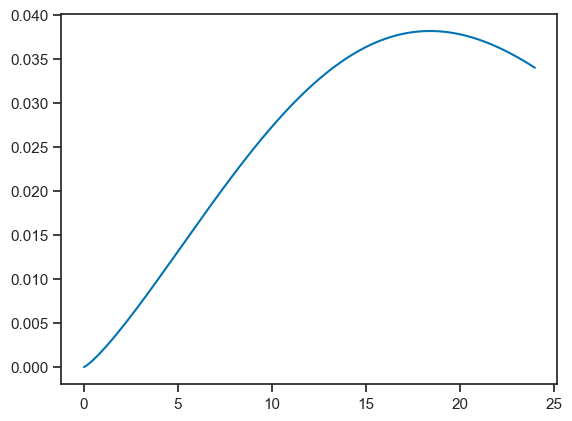

In [349]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

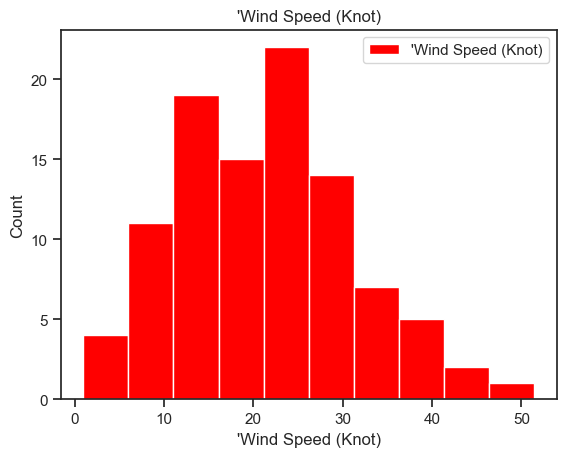

In [350]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

<AxesSubplot:ylabel='Density'>

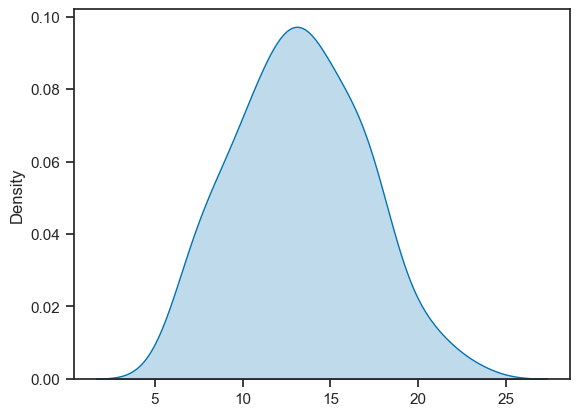

In [351]:
import numpy as np

x = np.random.poisson(lam=13.5, size=100)

sns.kdeplot(x,shade=True)

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Normal distribution variables
mu1, sigma1 = 10.55, .67
mu2, sigma2 = 0, 1
normal1 = np.random.normal(mu1, sigma1, 180)
normal2 = np.random.normal(mu2, sigma2, 180)

# Weibull distribution variables
a1, b1 = 2.1, 8.5
a2, b2 = 5, 2
weibull1 = np.random.weibull(a1, 180) * b1
weibull2 = np.random.weibull(a2, 180) * b2

# Create dataframe
df23 = pd.DataFrame({
    'normal1': normal1,
    'normal2': normal2,
    'weibull1': weibull1,
    'weibull2': weibull2
})

In [353]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,195.000000,195.000000,195.000000,195.000000
mean,10.422564,29.856636,267.735385,13.044615
std,0.766908,0.020849,16.536686,5.296362
min,8.700000,29.828200,195.600000,1.900000
25%,9.950000,29.843000,256.750000,8.500000
50%,10.800000,29.848900,269.200000,14.300000
75%,10.900000,29.872500,280.300000,16.900000
max,11.700000,29.919800,297.900000,23.300000


Rayleigh PDF 